## Os 4 pilares da orientação a objetos

In [2]:
# Encapsulamento

In [3]:
class Account:
    def __init__(self, number, balance):
        self.number = number
        self.__balance = balance


account_01 = Account(1234, 700.84)
account_01.number

1234

In [4]:
account_01.__balance

AttributeError: 'Account' object has no attribute '__balance'

In [34]:
# Má prática

In [36]:
account_01._Account__balance

700.84

In [38]:
dir(account_01)

['_Account__balance',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'number']

In [40]:
account_01.__balance = 1000

In [42]:
account_01._Account__balance

700.84

In [44]:
dir(account_01)

['_Account__balance',
 '__balance',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'number']

In [46]:
class Account:
    def __init__(self, number, balance):
        self.__number = number
        self.__balance = balance


    def query_balance(self):
        return self.__balance


account_01 = Account(1000, 500.10)
account_01.query_balance()

500.1

In [48]:
# Heritage

In [50]:
class Person:
    def __init__(self, name, login, password):
        self.__name = name
        self.__login = login
        self.__password = password

    def query_name(self):
        return self.__name

'''
Como  boa  prática,  os  atributos  de
instância  são  non-public  e  a  maioria  dos  métodos,  public.  Isso
possibilita  que  a  conversa  entre  objetos  seja  feita  por  troca  de
mensagens'''

In [53]:
class Student(Person):
    def __init__(self, name, login, password, course):
        Person.__init__(self, name, login, password)
        self.__course = course


    def query_course(self):
        return self.__course

In [55]:
class Teacher(Person):
    def __init__(self, name, login, password, titration):
        Person.__init__(self, name, login, password)
        self.__titration = titration


    def query_titration(self):
        return self.__titration

In [57]:
person_02 = Person('Maria', 'Mary', 'maria123')
print(person_02.query_name())

Maria


In [59]:
student_01 = Student('Paulo', 'Paul', 'p456', 'IT')
print(student_01.query_name())
print(student_01.query_course())

Paulo
IT


In [61]:
teacher_01 = Teacher('Tatiana', 'titi', 'tata879', 'Doutorado')
print(teacher_01.query_name())
print(teacher_01.query_titration())

Tatiana
Doutorado


In [63]:
# Polymorphism

'''polimorfismo permite que um método seja definido em uma classe base, mas que tenha diferentes implementações em suas subclasses, permitindo que o mesmo método possa ser chamado de diferentes formas dependendo do objeto que o utiliza.'''

In [66]:
class IntoUniversity:

    def __init__(self):
        pass

    def allow_entry(self, person):
        print('Pode entrar, ' + person_02.query_name())

In [68]:
into_test = IntoUniversity()

In [70]:
into_test.allow_entry(teacher_01)

Pode entrar, Maria


In [72]:
class Coordinator(Person):
    def __init__(self, name, login, password):
        Person.__init__(self, name, login, password)

In [74]:
coordinator_01 = Coordinator('Joamir', 'crowntoyota', 'tacoma')

In [76]:
into_test.allow_entry(coordinator_01)

Pode entrar, Maria


In [78]:
class Animal:
    def sound(self):
        pass


class Dog(Animal):
    def sound(self):
        return 'Woof!'


class Cat(Animal):
    def sound(self):
        return 'Meow!'

In [80]:
# Abstraction

In [82]:
import abc

In [134]:
class Person(abc.ABC):

    def __init__(self, name, login, password):
        self.name = name
        self.login = login
        self.password = password


    # @abc.abstractmethod
    # def query_name(self):
    #     raise NotImplementedError()

In [136]:
person_03 = Person()

TypeError: Person.__init__() missing 3 required positional arguments: 'name', 'login', and 'password'

In [138]:
# Association

In [140]:
class Student(Person):
    def __init__(self, name, login, password, course, supervising_teacher):
        Person.__init__(self, name, login, password)
        self.__course = course
        self.__supervising_teacher = supervising_teacher

    def query_course(self):
        return self.__course

    def query_supervising_teacher(self):
        return self.__supervising_teacher

    def query_name(self):
        return self.name

In [142]:
teacher_02 = Teacher('Joamir', 'moraes', 'swenden2027', 'Doctor')

TypeError: Teacher.__init__() takes 2 positional arguments but 5 were given

In [144]:
student_02 = Student('Isabela', 'isa', 'norway', 'Engineer', teacher_02)

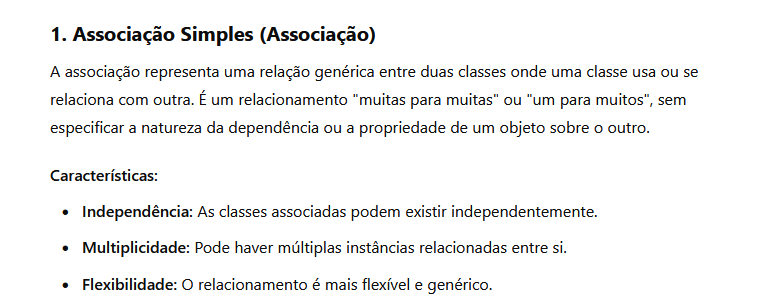

In [147]:
# Sample

In [149]:
class Teacher:
    def __init__(self, name):
        self.name = name
        self.department = []

    def add_department(self, departament):
        self.department.append(departament)


class Department:
    def __init__(self, name):
        self.name = name
        self.teachers = []

    def add_teacher(self, teacher):
        self.teachers.append(teacher)

In [151]:
# Use
teacher_03 = Teacher('Dr Barbosa')
department_01 = Department('Math')

In [153]:
teacher_03.add_department(department_01)
department_01.add_teacher(teacher_03)

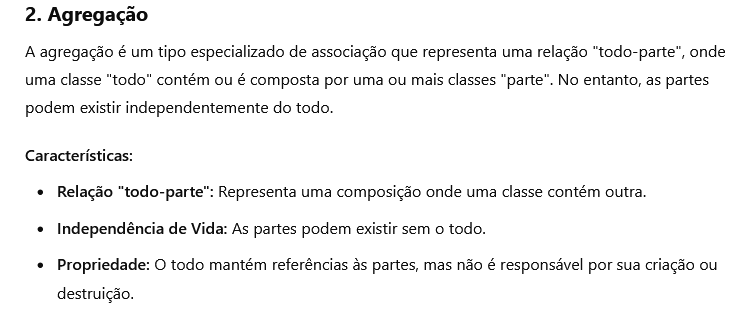

In [156]:
# Aggregation

In [158]:
class Teacher:
    def __init__(self, name):
        self.__name = name


class Department:
    def __init__(self, name):
        self.__name = name
        self.__teachers = []

    def add_teacher(self, teacher):
        self.__teachers.append(teacher)

    @property
    def get_list_teachers(self):
        return self.__teachers

In [160]:
teacher_04 = Teacher('Dr Kaio')
teacher_05 = Teacher('Dr Marcelo')

In [162]:
department_02 = Department('Physics')
department_02.add_teacher(teacher_04)
department_02.add_teacher(teacher_05)

In [164]:
department_02.get_list_teachers

[<__main__.Teacher at 0x21312d98990>, <__main__.Teacher at 0x213131ee5d0>]

In [166]:
# Composition

In [168]:
import datetime

In [170]:
class Student(Person):
    def __init__(self, name, login, password, course, supervising_teacher):
        Person.__init__(self, name, login, password)
        self.__course = course
        self.__supervising_teacher = supervising_teacher
        self.__track_record = TrackRecord()

    def query_course(self):
        return self.__course

    def query_supervising_teacher(self):
        return self.__supervising_teacher

    def generate_track_record(self, occurrence):
        self.__track_record.add_occurrence(occurrence)

    def query_track_record(self):
        self.__track_record.print_occurrences()

In [174]:
student_03 = Student('Isabela', 'isa', 'i123', 'Engenharia', teacher_02)

In [176]:
student_03.generate_track_record('Matriculou-se em Calculo 1')

In [178]:
student_03.generate_track_record('Nota final em Cálculo 1: 9,7')

In [180]:
student_03.query_track_record()

Matriculado em 2024-09-17 23:07:55.123063
Occurrences: 
-  Matriculou-se em Calculo 1
-  Nota final em Cálculo 1: 9,7
